# Extra Practise

For an optional bit of "on your own" practise, lets take this Kaggle Pokemon dataset (https://www.kaggle.com/abcsds/pokemon) and try and answer a few questions visually:

1. What does the Attack vs Defense distribution look like? 
    1. Advanced: Break it down by Type
2. What are the top 10 pokemon by summed attributes?
    1. Can you modify the load in code and do this for a different generation, or only for "Mega" pokemon?
3. What are the distributions of battle states (HP, attack through to speed)?
    1. Even better, what are the distributions, by type of pokemon, for the above question

Download the data, and this code should get you started. Remember that there are a thousand ways to answe these questions. If your solution looks completely different to mine, that's fine! I'm going to quickly restrict the data and only look at Gen1 Pokemon without the "Mega" label for simplicity.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
import numpy as np

df = pd.read_csv("Pokemon.csv")
# Filtering on the data. Don't get caught up on this, we'll cover it very soon!
df = df[df.Generation == 1 & ~df.Name.str.contains("Mega")]
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


## Pokemon Attack and Defense Correlation

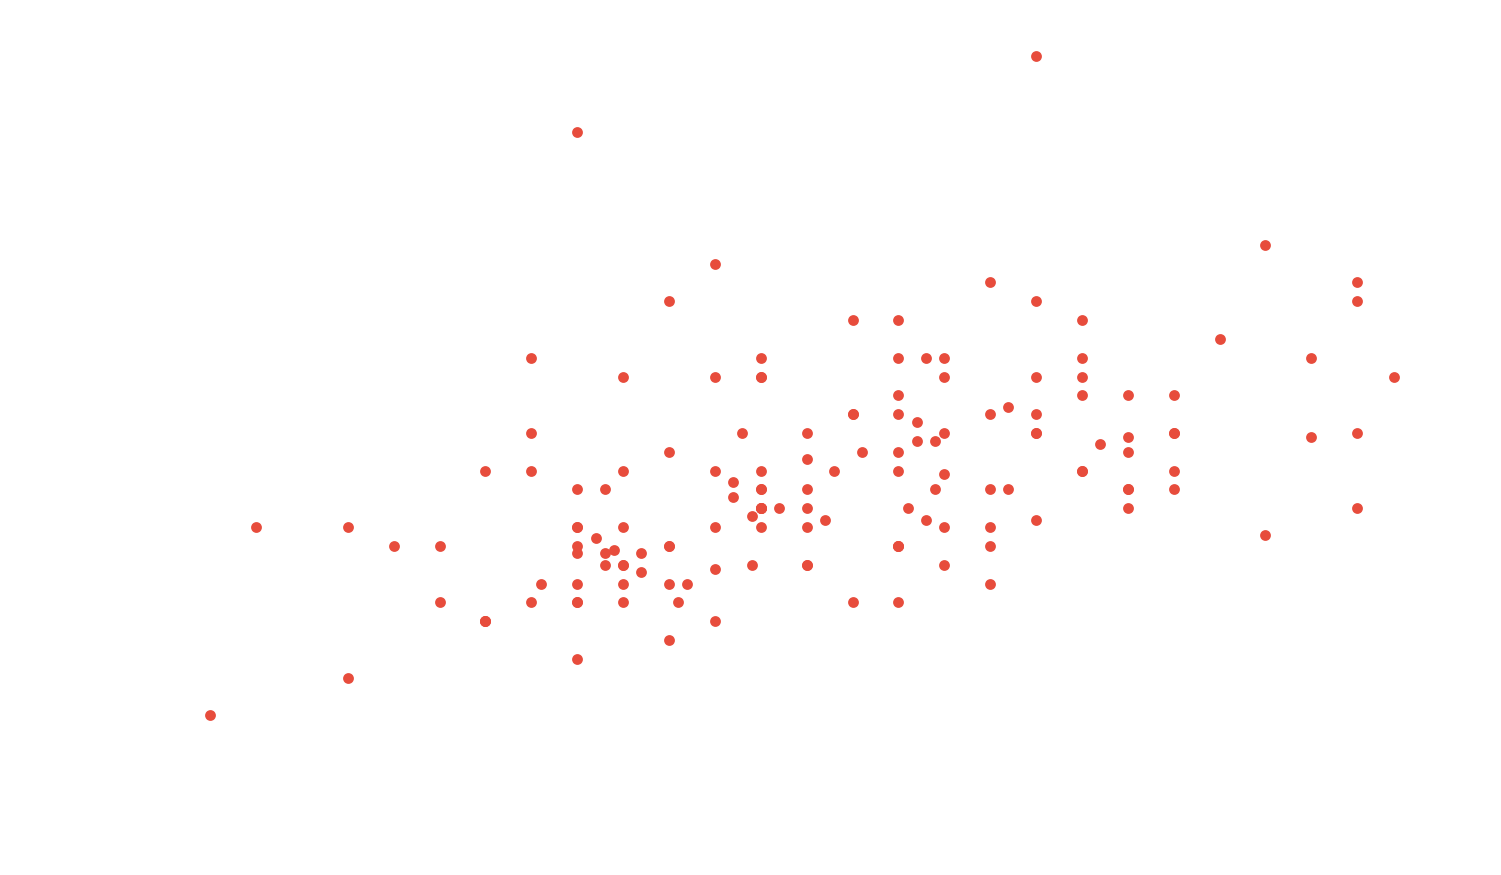

In [58]:
# This is the most basic plot we could make
df.plot.scatter("Attack", "Defense", s=5);

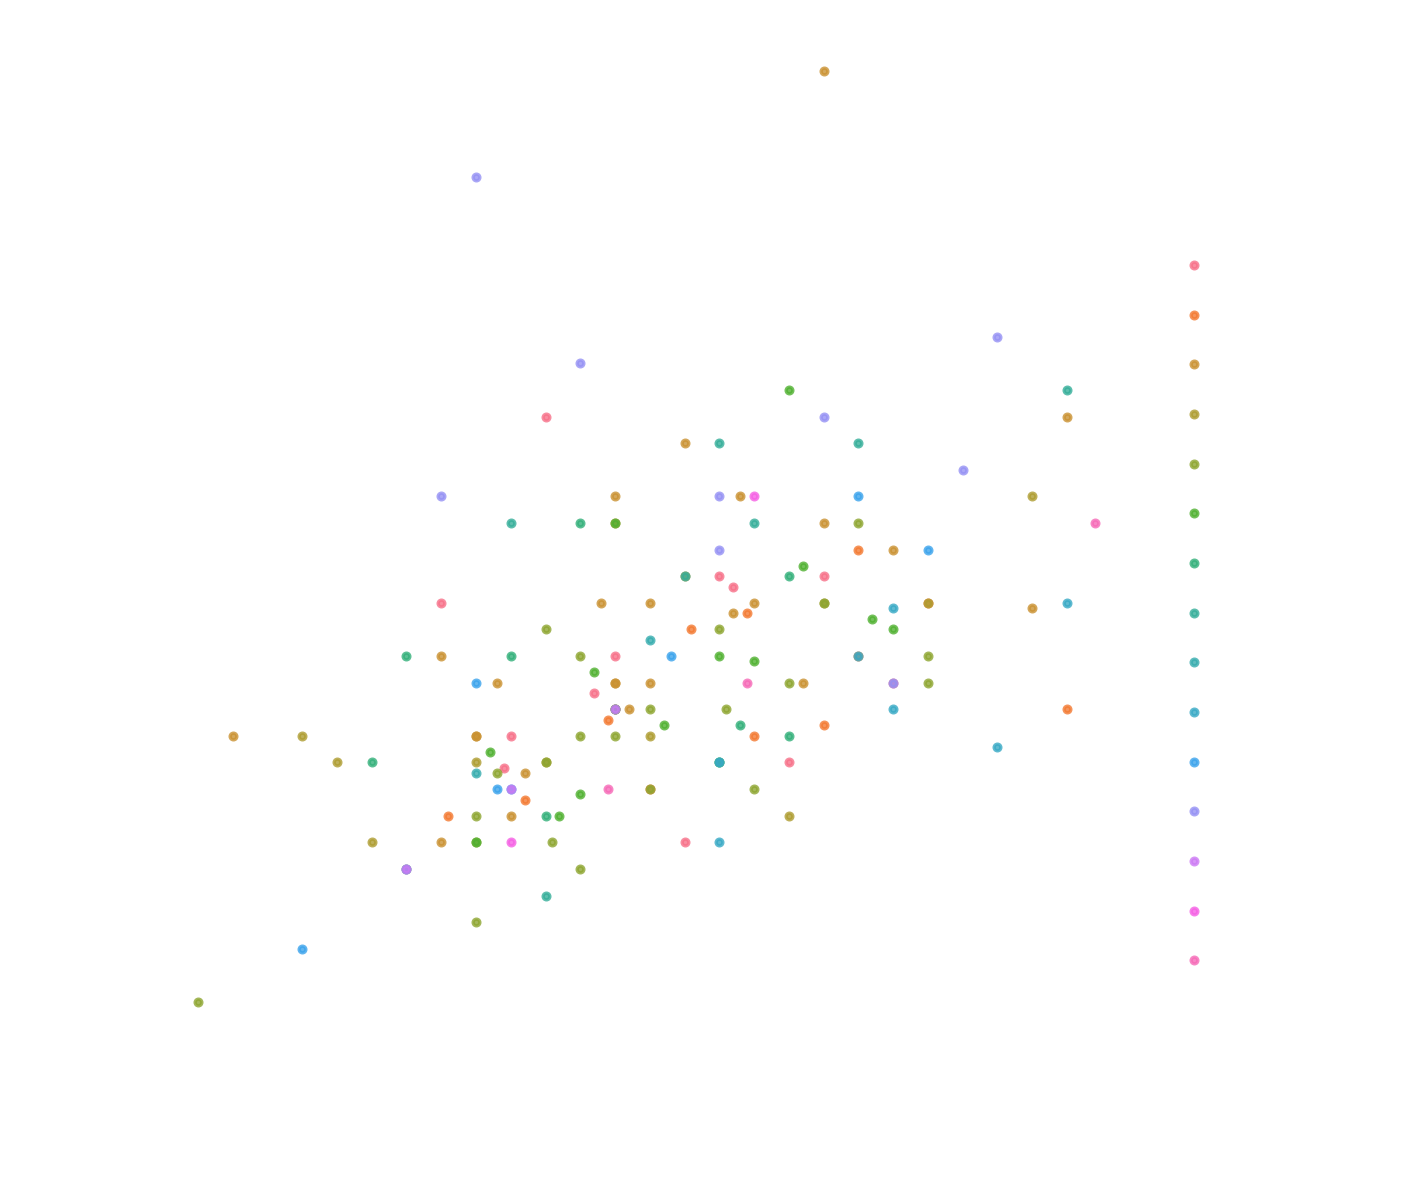

In [59]:
# To do it by type we have a few options we can use. The easiest is to use on of seaborns
# million different plotting functions, so here's a new one for you:

sb.lmplot("Attack", "Defense", hue="Type 1", data=df, fit_reg=False);

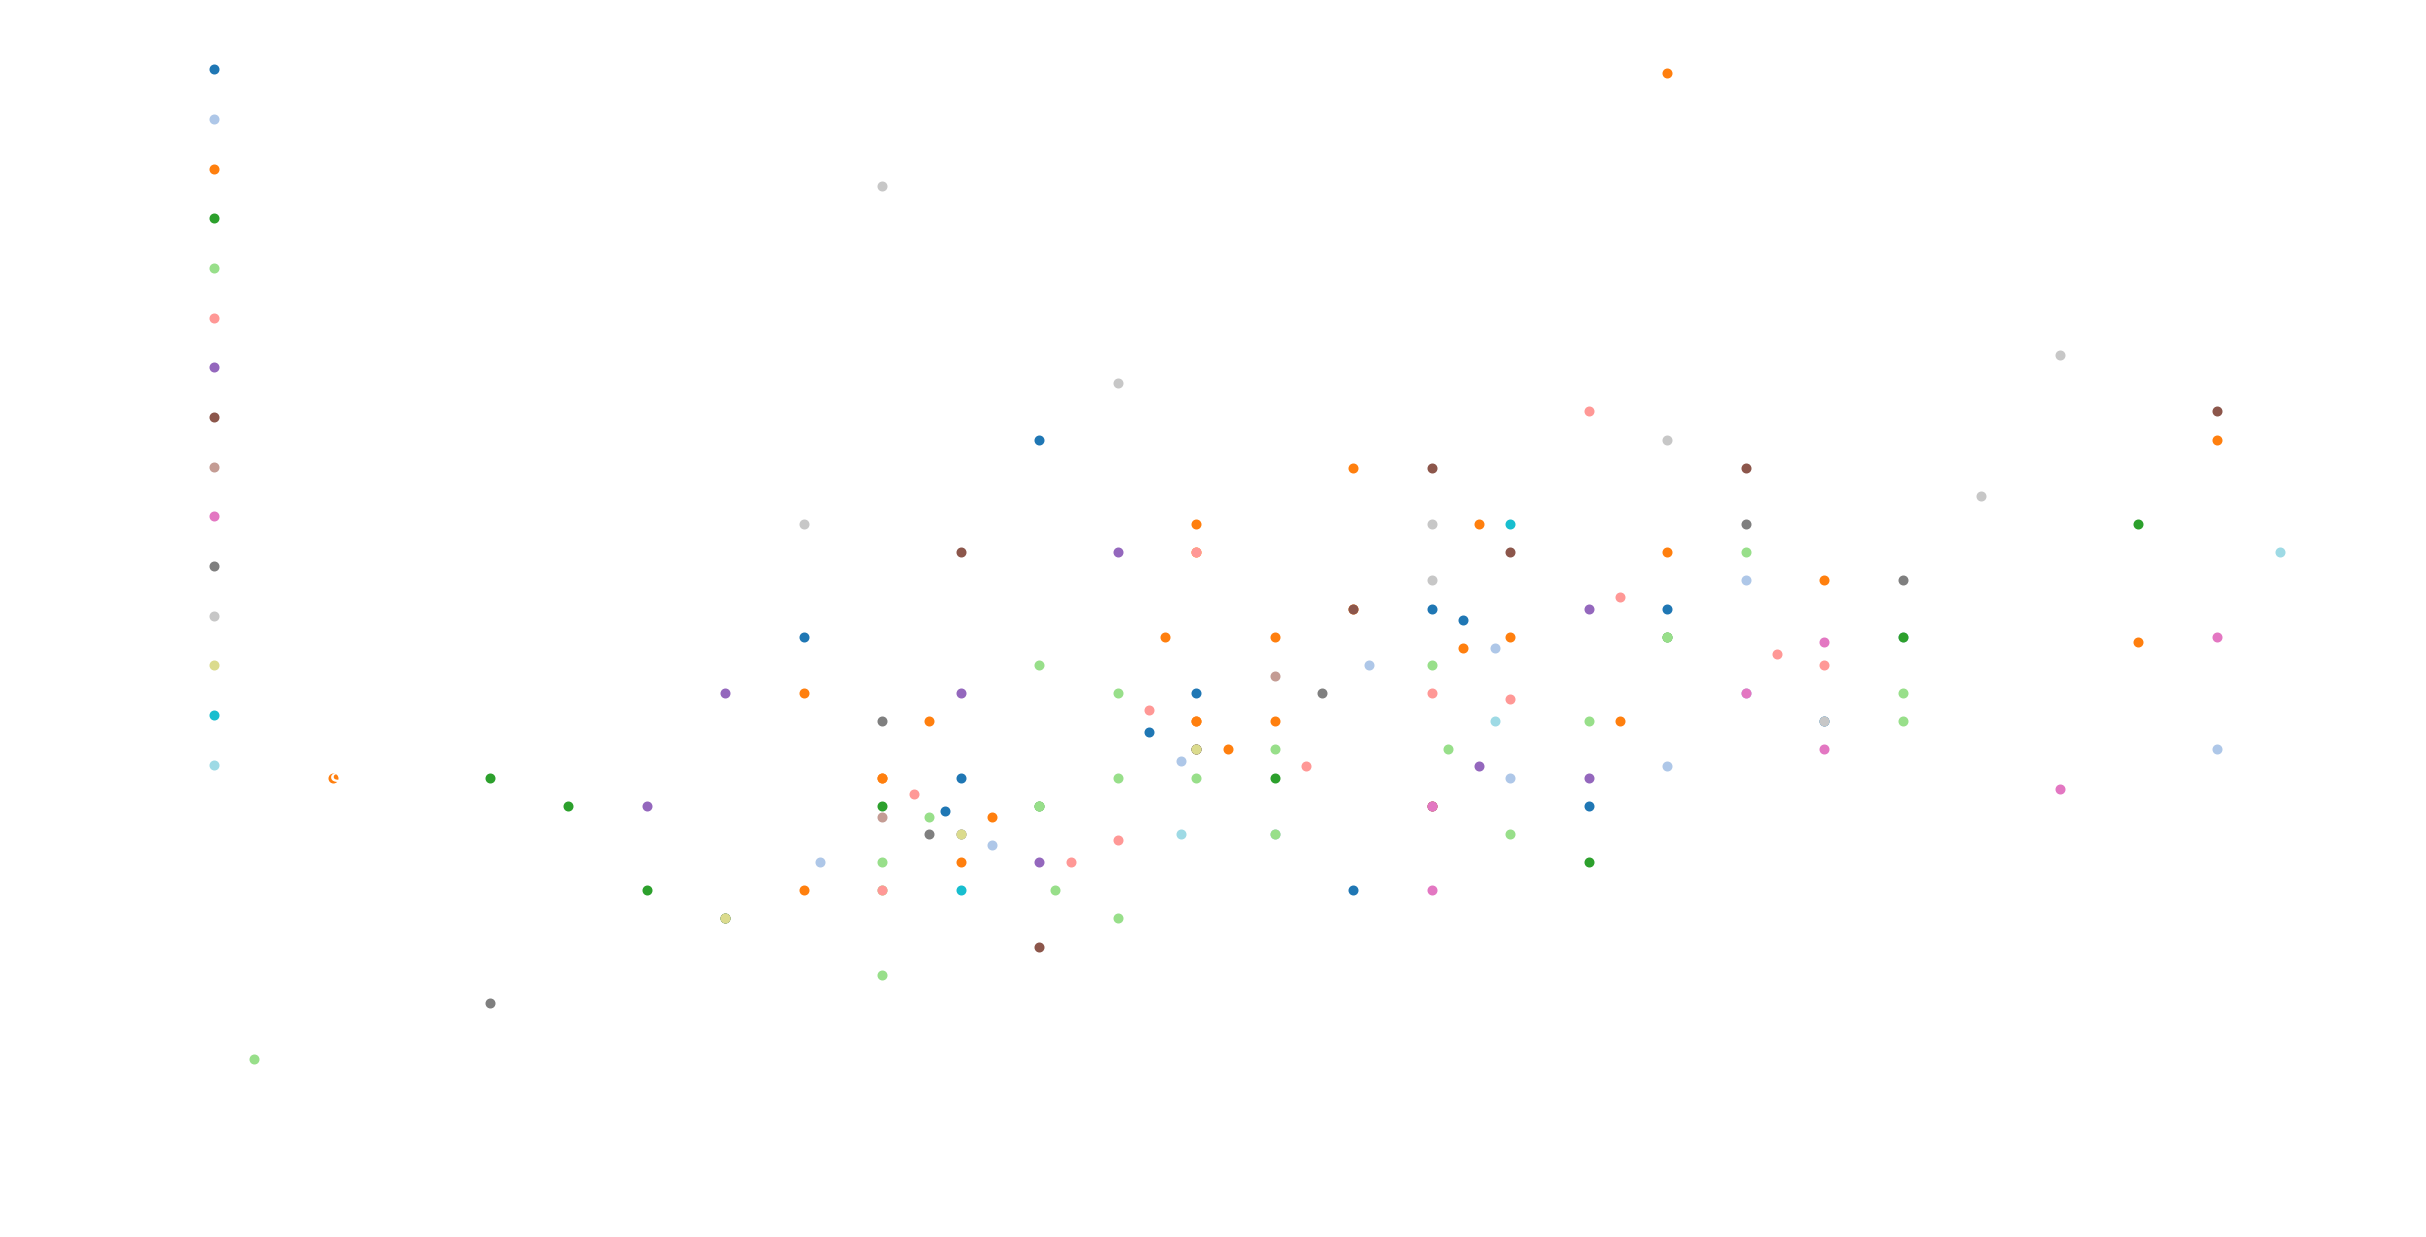

In [60]:
# Or we could define our own colour pallete and use a function you'll see in the next chapter

# Get all the types
types = df["Type 1"].unique()
# Get colours for each type
cs = matplotlib.cm.tab20(np.linspace(0, 1, len(types)))

fig, ax = plt.subplots(figsize=(12, 6))
for c, t in zip(cs, types):
    df2 = df[df["Type 1"] == t]
    ax.scatter(df2["Attack"], df2["Defense"], color=c, label=t)
ax.legend(), ax.set_xlabel("Attack"), ax.set_ylabel("Defense");

In [61]:
# Another way would be to use GroupBy, or add a new column to make the above code more efficient.
# But don't want to get too ahead of myself

## Strongest Pokemon by Summed Stats

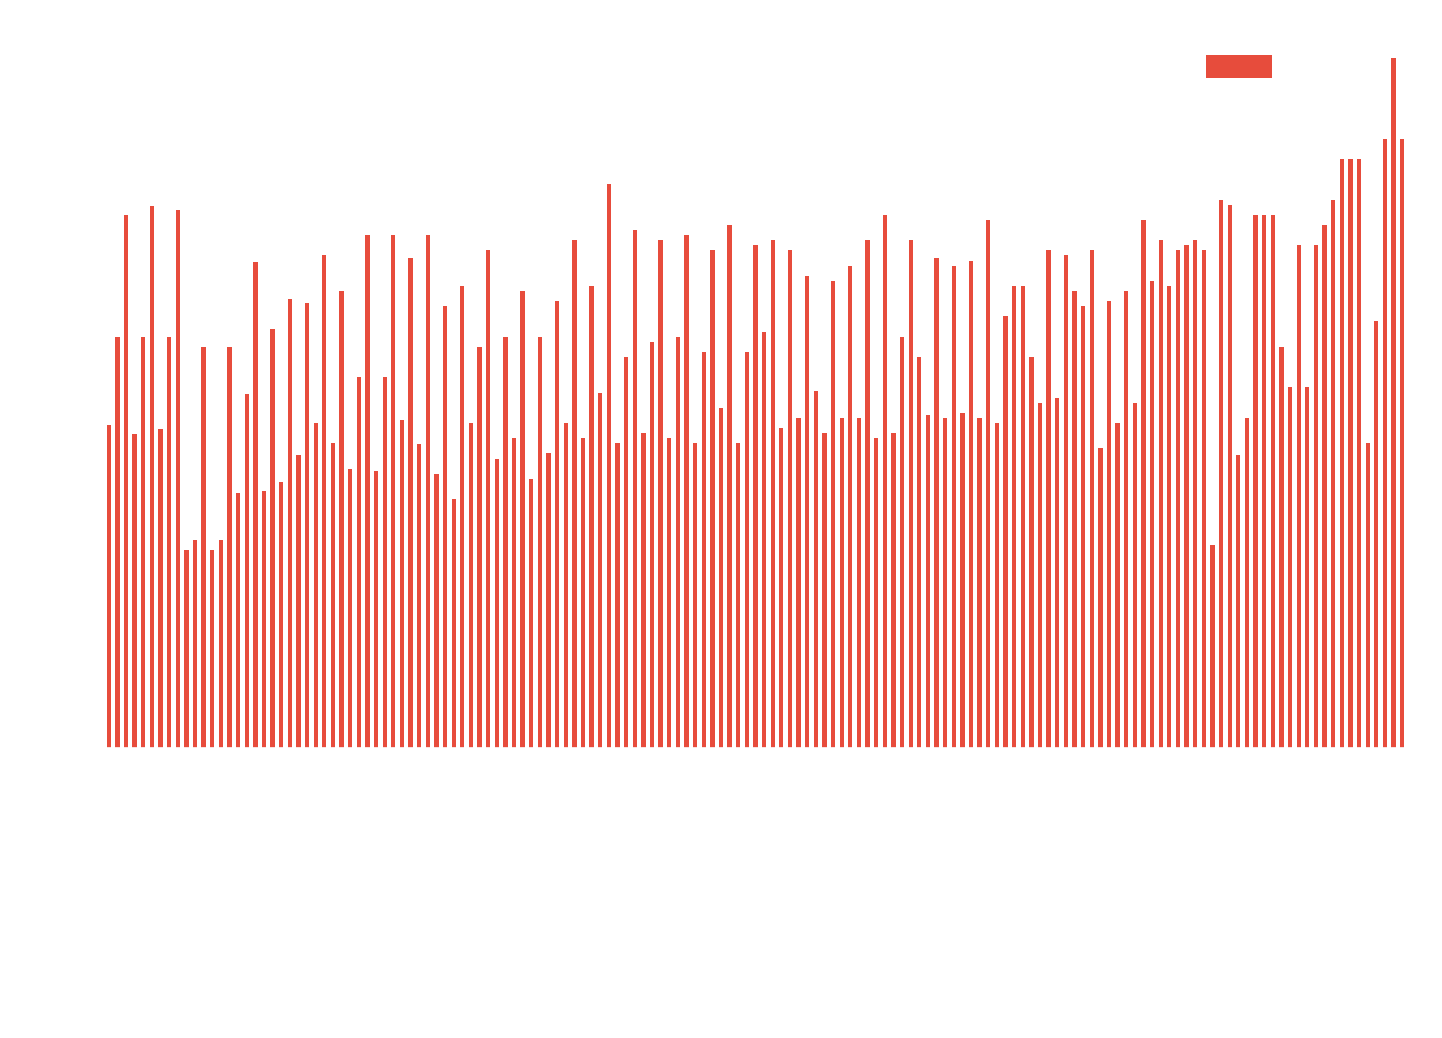

In [62]:
# So technically this is correct, but its a bit hard to read
df.plot.bar("Name", "Total");

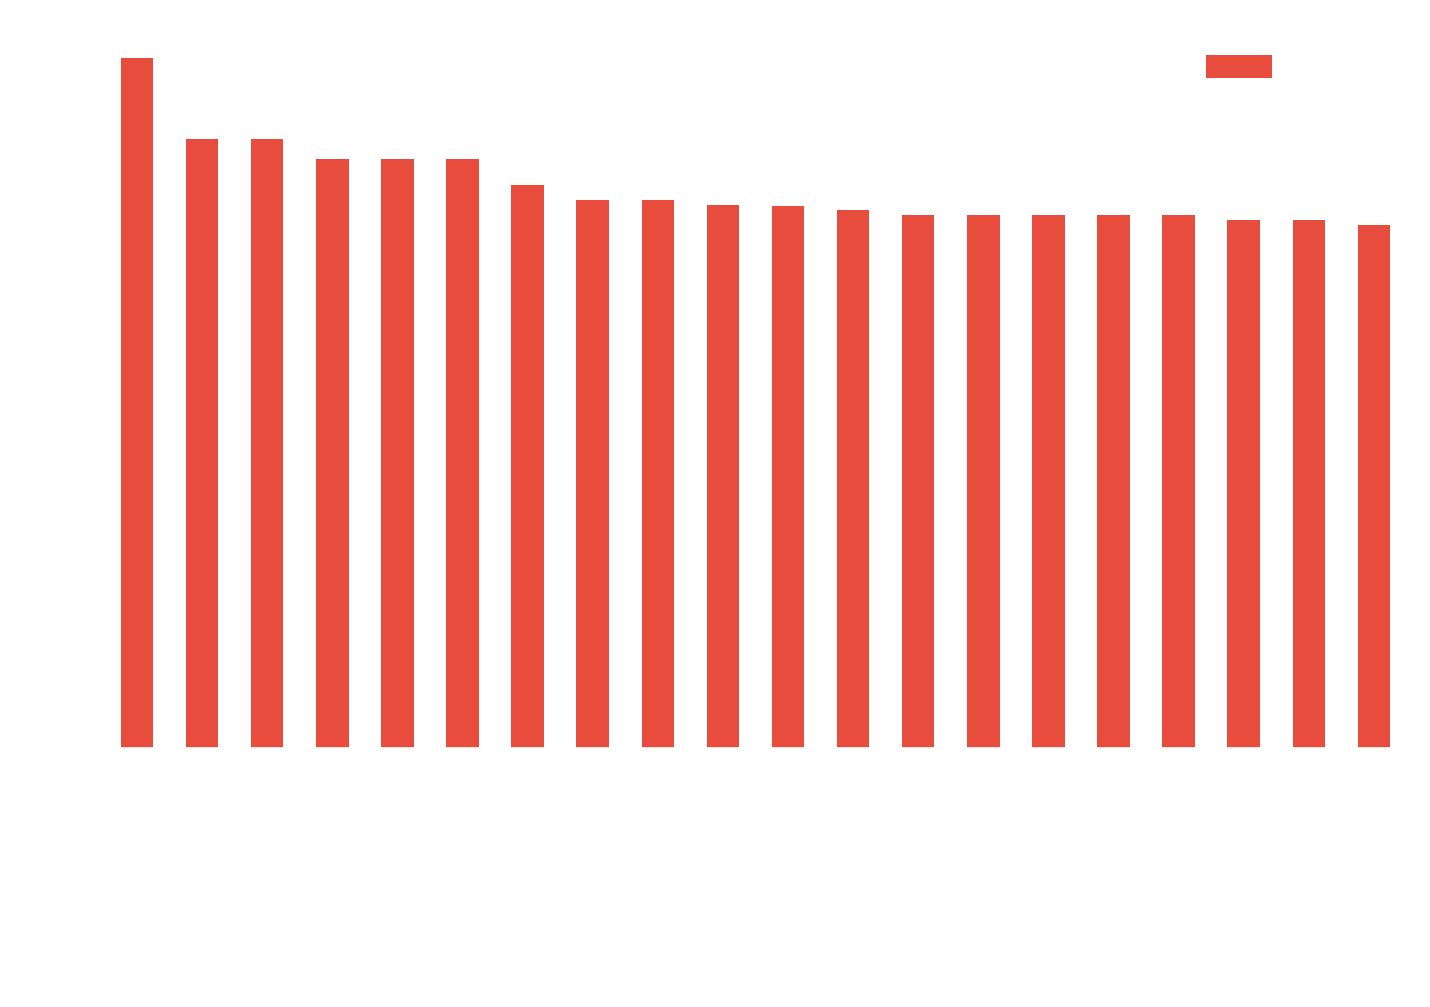

In [63]:
# So heres a way of doing it, again using functions from the next chapter.
# We sort by Total, take the top 20 rows, and plot
df.sort_values("Total", ascending=False).iloc[:20, :].plot.bar("Name", "Total");

## Distribution of Battle stats

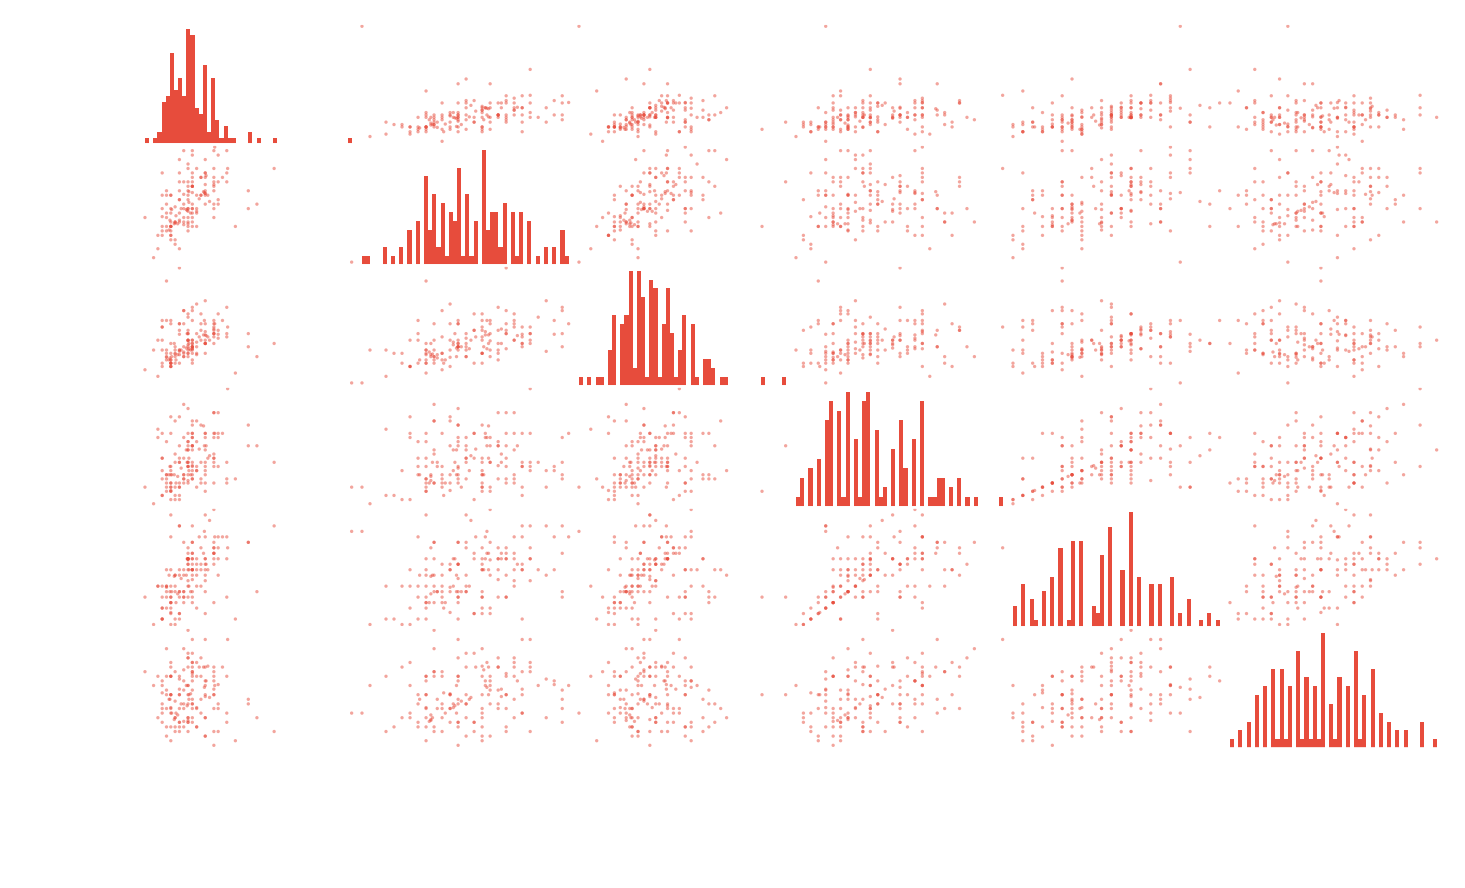

In [74]:
# You might notice that the default scatter_matrix you tried might throw an error,
# complaining about numpy boolean subtract (depending on your versions of pandas and numpy)
# You can either turn Legendary into a number (using astype) if that happens, or not plot it

columns = df.columns[5:-2]
pd.plotting.scatter_matrix(df[columns]);

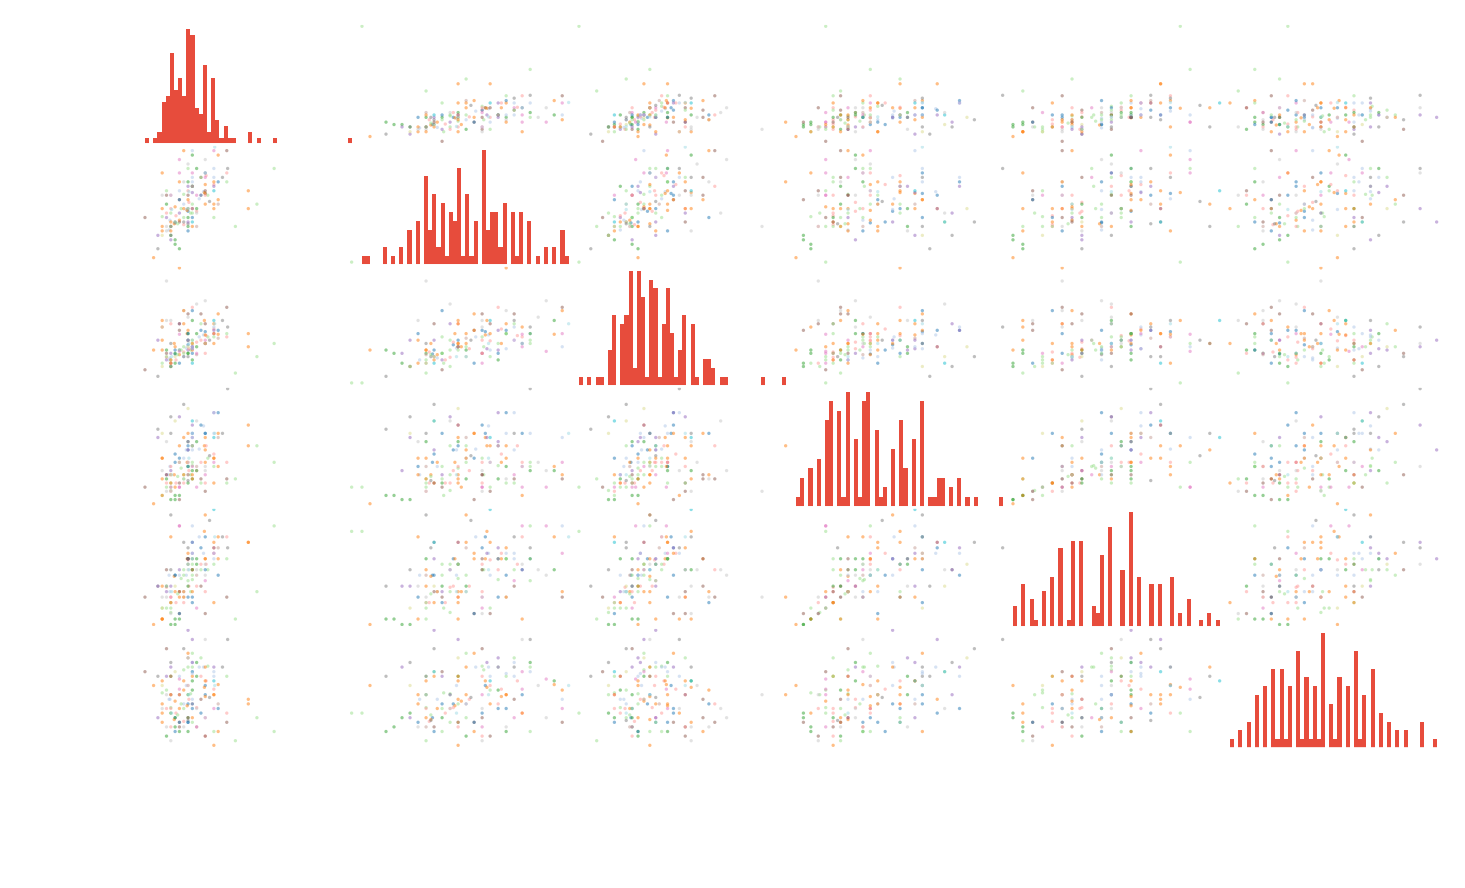

In [82]:
# To get separate colours, lets try adding that new column. If you want to know how it all works
# keep watching, its coming soon!

# Using the types and cs from previous code
mapping = {t: c for t, c in zip(types, cs)}
pd.plotting.scatter_matrix(df[columns], color=df["Type 1"].map(mapping));

In [83]:
# To get the histograms broken down too, we'd normally move away from scatter_matrix
# and do it ourselves